#### Importing Libraries and Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

austin_weather = pd.read_csv('data/austin_weather.csv')

In [2]:
austin_weather.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Extracting Date,Avg Temperature and Avg Wind Speed columns

In [3]:
austin_weather = austin_weather[['Date', 'TempAvgF', 'WindAvgMPH']].head(30)
austin_weather

,Date,TempAvgF,WindAvgMPH
0,2013-12-21,60,4
1,2013-12-22,48,6
2,2013-12-23,45,3
3,2013-12-24,46,4
4,2013-12-25,50,2
5,2013-12-26,48,3
6,2013-12-27,53,1
7,2013-12-28,51,2
8,2013-12-29,50,5
9,2013-12-30,40,5


### Plotting two lines with 2 separate Y axes with the same X axis
First create one axis and then use the twinx() function to create another axis sharing the same X axis

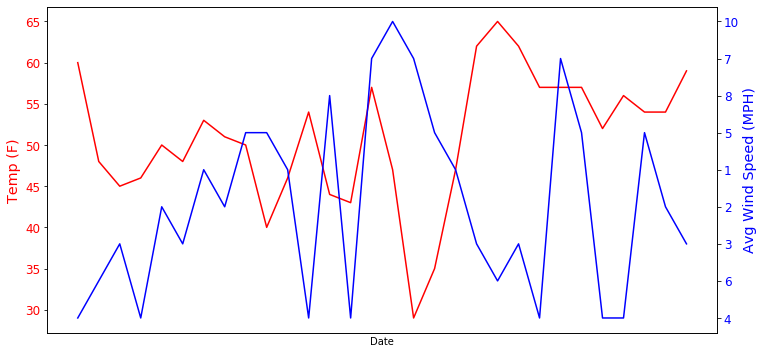

In [8]:
 # Subplot for Plotting Figure
fig, ax_tempF = plt.subplots()  

# Similar to fig=plt.figure(figsize=(12,6))
fig.set_figwidth(12)
fig.set_figheight(6)

# set x label which is common
ax_tempF.set_xlabel('Date')

# bottom= false disables ticks and labelbottom disables x-axis labels
ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False) 

# set left y-axis label
ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

# set labelcolor and labelsize to the left Y-axis
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# plot AvgTemp on Y-axis to the left 
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='red')

#ax_tempF.legend(0)

# twinx sets the same x-axis for both plots 
ax_precip = ax_tempF.twinx()

#set Right y-axis label
ax_precip.set_ylabel('Avg Wind Speed (MPH)', 
                     color='blue', 
                     size='x-large') 

# set labelcolor and labelsize to the Right Y-axis
ax_precip.tick_params(axis='y', 
                      labelcolor='blue',
                      labelsize='large')

# plot WindAVg on Y-axis to the Right 
ax_precip.plot(austin_weather['Date'], 
         austin_weather['WindAvgMPH'], 
         color='blue')

plt.show()

### Twin axis for the same data
If the same data can be expressed in different units, we can configure our axis to display both units on two axes.

####  Function to convert from fahrenheit to celsius

In [9]:
def fahrenheit2celsius(f):
    return (f - 32)*5/9

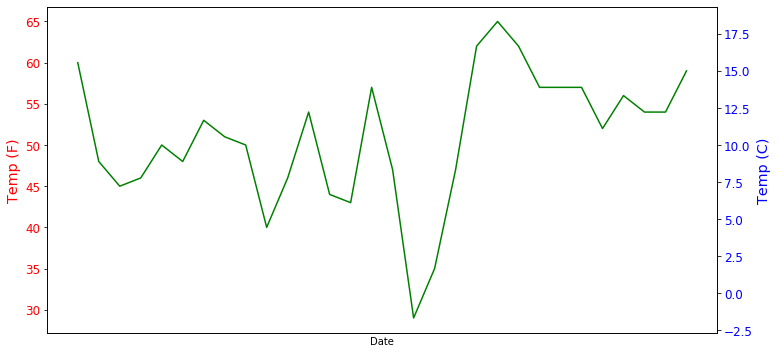

In [10]:
 # Subplot for Plotting Figure
fig, ax_tempF = plt.subplots()

# Similar to fig=plt.figure(figsize=(12,6))
fig.set_figwidth(12)
fig.set_figheight(6)

# set x label which is common
ax_tempF.set_xlabel('Date')

# bottom= false disables ticks and labelbottom disables x-axis labels
ax_tempF.tick_params(axis = 'x',
                    bottom=False,
                    labelbottom=False)

# set left y-axis label
ax_tempF.set_ylabel('Temp (F)', 
                    color='red',
                    size='x-large')

# set labelcolor and labelsize to the left Y-axis
ax_tempF.tick_params(axis='y', 
                     labelcolor='red', 
                     labelsize='large')

# plot AvgTemp on Y-axis to the left
ax_tempF.plot(austin_weather['Date'], 
              austin_weather['TempAvgF'], 
              color='green')

# twinx sets the same x-axis for both plots 
ax_tempC = ax_tempF.twinx()

# get ymin and ymin of AvgTemp in Fahrenheit
ymin, ymax = ax_tempF.get_ylim()

# set ymin and ymin of AvgTemp in Fahrenheit to AvgTemp in Celsius
ax_tempC.set_ylim((fahrenheit2celsius(ymin),
                   fahrenheit2celsius(ymax)))

#set Right y-axis label
ax_tempC.set_ylabel('Temp (C)', 
                    color='blue',
                    size='x-large')

# plot AvgTemp in Celsius on Y-axis to the Right 
ax_tempC.tick_params(axis='y', 
                     labelcolor='blue', 
                     labelsize='large')

plt.show()